Heart Disease Prediction by B.Vishnu Charan Tej
Python · UCI Heart Disease Data

Meta-Data (About Dataset)

Context:
This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 16 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. . The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.

Content :

Column Descriptions:


*  id (Unique id for each patient)

*  age (Age of the patient in years)

*  dataset (place of study)

*  sex (Male/Female)

*   cp chest pain type
       typical angina,
       atypical angina,
       non-anginal,
       asymptomatic
*   trestbps resting blood pressure
    (resting blood pressure (in mm Hg on admission to the hospital))


*   chol (serum cholesterol in mg/dl)


*   fbs (if fasting blood sugar > 120 mg/ dl)

*   restecg (resting electrocardiographic re


*   thalch: maximum heart rate achieved

*  exang: exercise-induced angina (True/ False)
*  oldpeak: ST depression induced by exercise rela


*  slope: the slope of the peak exercise ST segme

*  ca: number of major vessels (0-3) colored b

*  thal: [normal; fixed defect; reversible defect]
*  num: the predicted attribute














Feature that we will be using in Machine Learning Models building

The Targeted column is num which is the predicted attribute. We will use this column to predict the heart disease. The unique values in this column are: [0,1,2,3,4], which states that there are 5 types of heart diseases.

0 = no heart disease.
1 = Mild Heart Disease types.
2 = Moderate Heart Disease type.
3 =  Severe Heart Disease type.
4 =  Critical Heart Disease type.

importing libraries


In [ ]:
# 1. to handle the data
import pandas as pd
import numpy as np

# 2. To Viusalize the data
import matplotlib.pyplot as plt
import seaborn as sns

# 3. To preprocess the data
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer# KNNImputer

# 4. import Iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# 5. Machine Learning
from sklearn.model_selection import train_test_split,cross_val_score

# 6. For Classification task.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# 7. Metrics
from sklearn.metrics import accuracy_score, classification_report

# 8. Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#9.for building predictive sysytem task
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline




data loading



In [ ]:
#Read the dataset
df = pd.read_csv("/content/drive/MyDrive/heart_disease_uci.csv")
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


Exploratory Data Analysis


In [ ]:
#Know the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [ ]:
#display rows and columns
df.shape

(920, 16)

Visualization

In [ ]:
#display age statistical analysis
df['age'].describe()


count    920.000000
mean      53.510870
std        9.424685
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64

age column distribution is normally distributed we can see clearly see the bell curve

In [ ]:
df_patients = df[df['num'] != 0]
df_patients

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
6,7,62,Female,Cleveland,asymptomatic,140.0,268.0,False,lv hypertrophy,160.0,False,3.6,downsloping,2.0,normal,3
8,9,63,Male,Cleveland,asymptomatic,130.0,254.0,False,lv hypertrophy,147.0,False,1.4,flat,1.0,reversable defect,2
9,10,53,Male,Cleveland,asymptomatic,140.0,203.0,True,lv hypertrophy,155.0,True,3.1,downsloping,0.0,reversable defect,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,914,62,Male,VA Long Beach,asymptomatic,158.0,170.0,False,st-t abnormality,138.0,True,0.0,NaN,NaN,NaN,1
914,915,46,Male,VA Long Beach,asymptomatic,134.0,310.0,False,normal,126.0,False,0.0,NaN,NaN,normal,2
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2


0. Distribution of Patients Age with and without Heart Disease

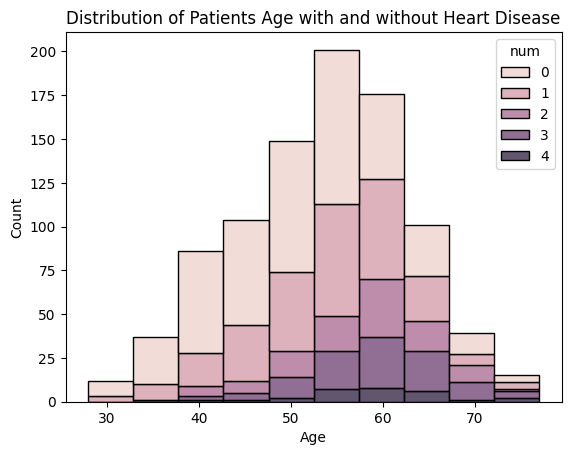

In [ ]:
#To Plot histogram to show Distribution of Patients' Age with and without Heart Disease
sns.histplot(data=df, x='age', hue='num', multiple='stack', binwidth=5)
plt.title('Distribution of Patients Age with and without Heart Disease')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

The graph shows the distribution of age for patients with and without heart disease. There is a higher frequency of heart disease cases among older patients, particularly those aged 55-65, while younger patients tend to have lower rates of heart disease.

1.Heart Disease Prevalence by Sex



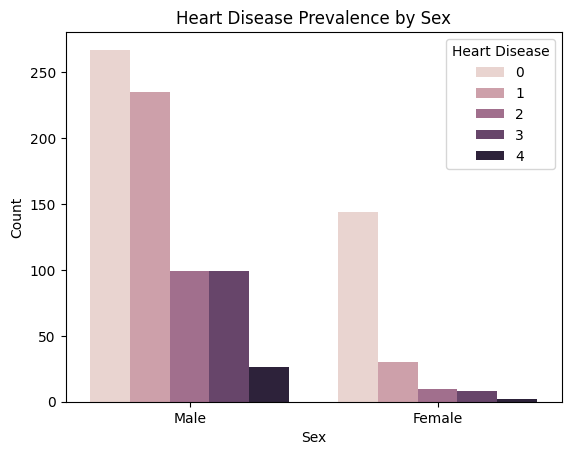

In [ ]:
# count plot to show the relationship between gender and heart disease
sns.countplot(data=df, x='sex', hue='num')
plt.title('Heart Disease Prevalence by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['0', '1', '2', '3', '4'])
plt.show()


We can notice that men are more susceptible to heart disease at all levels

2.Relationship Between Cholesterol Levels and Heart Disease

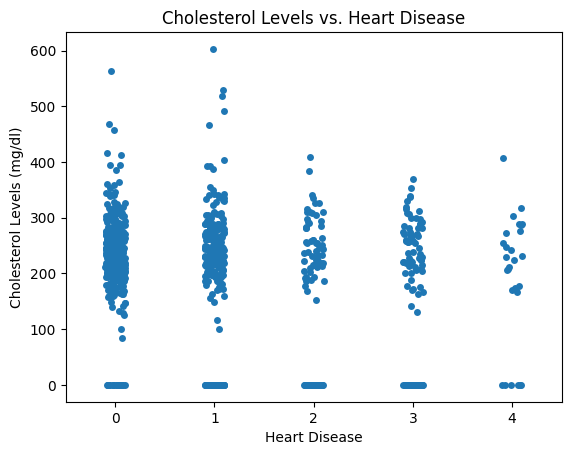

In [ ]:



# Strip plot to show the relationship between cholesterol levels and heart disease
sns.stripplot(data=df, x='num', y='chol', jitter=True)
plt.title('Cholesterol Levels vs. Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Cholesterol Levels (mg/dl)')
plt.xticks([0, 1, 2, 3, 4], ['0', '1', '2', '3', '4'])
plt.show()




The strip plot illustrates cholesterol levels across five heart disease categories, showing median values, range variability, and outliers. Categories 1 to 4 have similar medians, but the spread and outliers differ, with category 0 showing the most variability

4.Maximum Heart Rate and Heart Disease

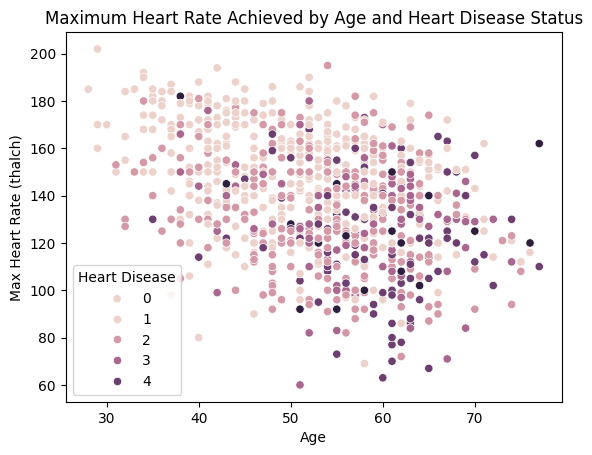

In [ ]:
# Scatterplot plot to show the relationship between age and heart disease
sns.scatterplot(data=df, x='age', y='thalch', hue='num')
plt.title('Maximum Heart Rate Achieved by Age and Heart Disease Status')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate (thalch)')
plt.legend(title='Heart Disease', labels=['0', '1', '2', '3', '4'])
plt.show()

For individuals between 50 and 60 years old, there appears to be a significant overlap in maximum heart rates achieved across the different heart disease status categories.

5.The Impact of Exercise-Induced Angina on Heart Disease

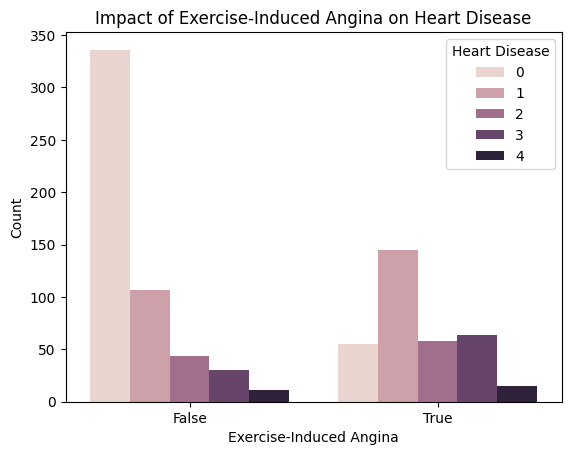

In [ ]:
# count plot to show the relationship between cholesterol ecang and heart disease
sns.countplot(data=df, x='exang', hue='num')
plt.title('Impact of Exercise-Induced Angina on Heart Disease')
plt.xlabel('Exercise-Induced Angina')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['0', '1', '2', '3', '4'])
plt.show()


Most cases in category 0 do not report angina, while categories 1 through 4 show a more varied distribution, with both angina and non-angina cases present. The data suggests that exercise-induced angina is more commonly reported in individuals with heart disease categories 1 to 4 compared to category 0



6. Average Resting Blood Pressure by Heart Disease Status

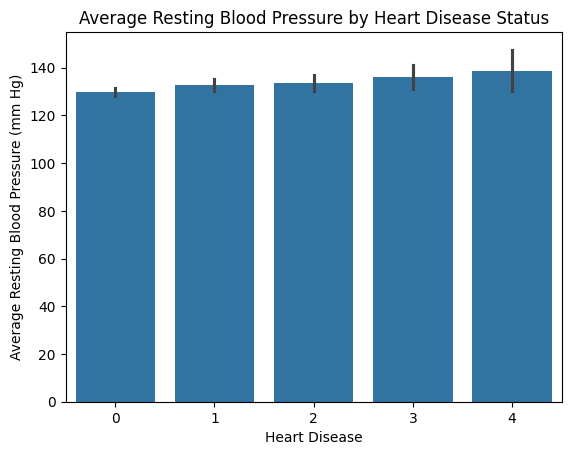

In [ ]:
# bar plot to show the relationship between Average resting blood pressure and heart disease
sns.barplot(data=df, x='num', y='trestbps')
plt.title('Average Resting Blood Pressure by Heart Disease Status')
plt.xlabel('Heart Disease')
plt.ylabel('Average Resting Blood Pressure (mm Hg)')
plt.xticks([0, 1, 2, 3, 4], ['0', '1', '2', '3', '4'])
plt.show()

All categories show similar average blood pressures ranging slightly above 120 mm Hg. The error bars indicate some variability in the measurements, with a slight trend toward increasing variability from status 0 to 4

7.Distribution of Chest Pain Type among Patients

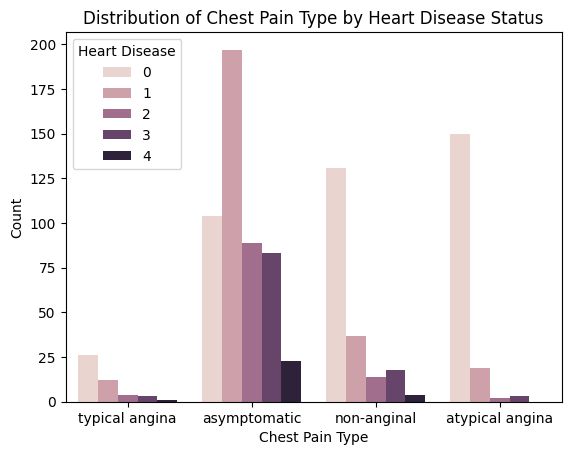

In [ ]:
# count plot to show the relationship between Distribution of chest type and heart disease
sns.countplot(data=df, x='cp', hue='num')
plt.title('Distribution of Chest Pain Type by Heart Disease Status')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['0', '1', '2', '3', '4'])
plt.show()

'Asymptomatic' is the most common type of chest pain across all heart disease statuses. 'Non-anginal' pain is the next notable frequency with heart disease status 4(,,,)

8.Fasting Blood Sugar and Heart Disease

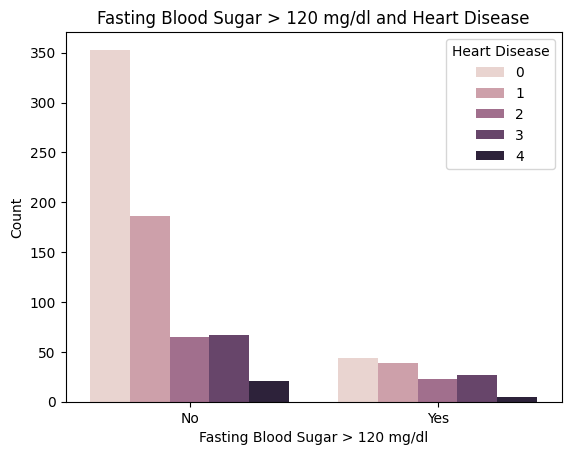

In [ ]:
# count plot to show the relationship between fasting blood sugar and heart disease
sns.countplot(data=df, x='fbs', hue='num')
plt.title('Fasting Blood Sugar > 120 mg/dl and Heart Disease')
plt.xlabel('Fasting Blood Sugar > 120 mg/dl')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['0', '1', '2', '3', '4'])
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


The majority of individuals across all heart disease statuses have fasting blood sugar levels at or below 120 mg/dl. For those with higher blood sugar levels, the counts are notably lower, suggesting that elevated fasting blood sugar is less common among these individuals regardless of their heart disease status.

9.Heart Disease Prevalence by Resting Electrocardiographic Results

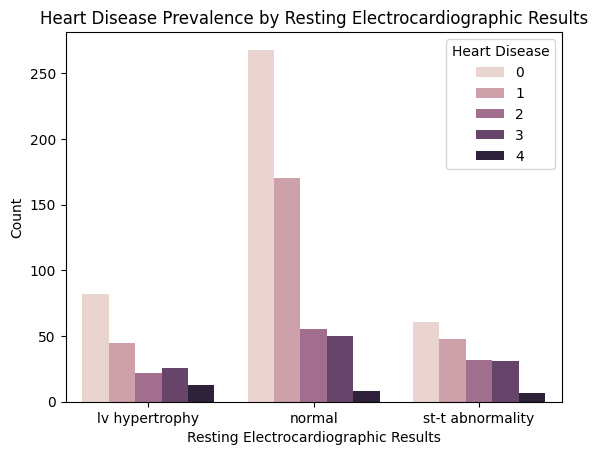

In [ ]:
# count plot to show the relationship between cholesterol levels and heart disease count
sns.countplot(data=df, x='restecg', hue='num')
plt.title('Heart Disease Prevalence by Resting Electrocardiographic Results')
plt.xlabel('Resting Electrocardiographic Results')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['0', '1', '2', '3', '4'])
plt.show()

Most individuals with a normal ECG result fall into the '0' heart disease category, indicating no presence of heart disease. In contrast, those with ST-T abnormalities show a higher count of heart disease statuses 1 through 4. Left Ventricular hypertrophy is less common but shows some presence across all heart disease categories

Checking Duplicate Values

In [ ]:
duplicates=df.duplicated().sum()
if duplicates > 0:
    print(f"There are {duplicates} duplicated rows in the dataset.")
else:
    print("No duplicated rows found in the dataset.")

No duplicated rows found in the dataset.


Handling missing values

In [ ]:
# let's check again for missing values
(df.isnull().sum()/ len(df)* 100).sort_values(ascending=False)



ca          66.413043
thal        52.826087
slope       33.586957
fbs          9.782609
oldpeak      6.739130
trestbps     6.413043
thalch       5.978261
exang        5.978261
chol         3.260870
restecg      0.217391
id           0.000000
age          0.000000
sex          0.000000
dataset      0.000000
cp           0.000000
num          0.000000
dtype: float64

In [ ]:
# Identify columns with missing values
df_miss = df.isnull().sum()
df_miss_cols = df_miss[df_miss > 0].index  # Filter columns with missing values

# Find categorical columns with missing values
cat_cols_with_missing = df[df_miss_cols].select_dtypes(include='object').columns.tolist()

# Find numerical columns with missing values
num_cols_with_missing = df[df_miss_cols].select_dtypes(exclude='object').columns.tolist()


#Treating ca as categorical feature
cat_cols_with_missing =['fbs', 'restecg', 'exang', 'slope', 'thal', 'ca']
num_cols_with_missing=['trestbps', 'chol', 'thalch', 'oldpeak']

print(f'\nCategorical Columns with Missing Values: {cat_cols_with_missing}')
print(f'Numerical Columns with Missing Values  : {num_cols_with_missing}')


Categorical Columns with Missing Values: ['fbs', 'restecg', 'exang', 'slope', 'thal', 'ca']
Numerical Columns with Missing Values  : ['trestbps', 'chol', 'thalch', 'oldpeak']


Impute missing values using **Iterative Imputer** for numerical columns.

In [ ]:
# create an object of iterative imputer
num_imputer = IterativeImputer(max_iter=10, random_state=42)


for col in num_cols_with_missing :
    df[col] = num_imputer.fit_transform(df[[col]])

In [ ]:
# let's check again for missing values
(df.isnull().sum()/ len(df)* 100).sort_values(ascending=False)

ca          66.413043
thal        52.826087
slope       33.586957
fbs          9.782609
exang        5.978261
restecg      0.217391
id           0.000000
age          0.000000
sex          0.000000
dataset      0.000000
cp           0.000000
trestbps     0.000000
chol         0.000000
thalch       0.000000
oldpeak      0.000000
num          0.000000
dtype: float64

**Impute the missing values in categorical columns**

In [ ]:
# remove warning
import warnings
warnings.filterwarnings('ignore')

# Impute missing values using the given functions
# df = impute_missing_data(df, categorical_cols, numerical_cols, bool_cols)
for col in cat_cols_with_missing :
    df[col].fillna(df[col].mode()[0], inplace=True)

In [ ]:
df.isnull().sum().sort_values(ascending=False)

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

Now Missing values are imputed and there is no missing values in the columns....

**Dealing With** **Outliers**

Deal with Outliers trestbps

trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))

Resting Blood Pressure cannot be zero Deal with Outliers oldpeak

oldpeak: ST depression induced by exercise relative to rest Deal with Outliers thalch


thalch: maximum heart rate achieved Deal with Outliers chol
chol (serum cholesterol in mg/dl)



6.Check Outliers with IQR Method

In [ ]:
# check number outliers in numeric_cols using IQR
Q1 = df[num_cols_with_missing].quantile(0.25)
Q2 = df[num_cols_with_missing].quantile(0.75)
IQR = Q2 - Q1
outliers_count_specified = ((df[num_cols_with_missing] < (Q1 - 1.5 * IQR)) | (df[num_cols_with_missing] > (Q2 + 1.5 * IQR))).sum()

outliers_count_specified

trestbps     28
chol        185
thalch        2
oldpeak      16
dtype: int64

In [ ]:
# remove outliers in 'trestbps' column
Q3 = df['trestbps'].quantile(0.25)
Q4 = df['trestbps'].quantile(0.75)
IQR = Q4 - Q3+
lower_bound = Q3 - 1.5 * IQR
upper_bound = Q4 + 1.5 * IQR
df=df[(df['trestbps'] >= lower_bound) & (df['trestbps'] <= upper_bound)]

In [ ]:
# remove outliers in 'oldpeak' column
Q5 = df['oldpeak'].quantile(0.25)
Q6 = df['oldpeak'].quantile(0.75)
IQR = Q6 - Q5
lower_bound = Q5 - 1.5 * IQR
upper_bound = Q6 + 1.5 * IQR
df=df[(df['oldpeak'] >= lower_bound) & (df['oldpeak'] <= upper_bound)]

In [ ]:
df['thalch'].skew()

-0.21299267126525606

In [ ]:
# remove outliers in 'thalch' column
Q7 = df['thalch'].quantile(0.25)
Q8 = df['thalch'].quantile(0.75)
IQR = Q8 - Q7
lower_bound = Q7 - 1.5 * IQR
upper_bound = Q8 + 1.5 * IQR
df=df[(df['thalch'] >= lower_bound) & (df['thalch'] <= upper_bound)]

In [ ]:
df['chol'].skew()

-0.6209061801185848

In [ ]:
# remove outliers in 'chol' column
Q9 = df['chol'].quantile(0.25)
Q10 = df['chol'].quantile(0.75)
IQR = Q10 - Q9
lower_bound = Q9 - 1.5 * IQR
upper_bound = Q10 + 1.5 * IQR
df=df[(df['chol'] >= lower_bound) & (df['chol'] <= upper_bound)]

Deal With Outliers

In [ ]:
#check number outliers in numeric_cols using IQR
Q11 = df[num_cols_with_missing].quantile(0.25)
Q12 = df[num_cols_with_missing].quantile(0.75)
IQR = Q12 - Q11
outliers_count_specified = ((df[num_cols_with_missing] < (Q11 - 1.5 * IQR)) | (df[num_cols_with_missing] > (Q12 + 1.5 * IQR))).sum()

outliers_count_specified

trestbps    0
chol        9
thalch      1
oldpeak     0
dtype: int64

In [ ]:
# remove remaining outliers in 'thalch' column
Q13 = df['thalch'].quantile(0.25)
Q14 = df['thalch'].quantile(0.75)
IQR = Q14 - Q13
lower_bound = Q13 - 0.75 * IQR
upper_bound = Q14 + 0.75 * IQR
df=df[(df['thalch'] >= lower_bound) & (df['thalch'] <= upper_bound)]

In [ ]:
# remove remaining outliers in 'chol' column
Q15 = df['chol'].quantile(0.25)
Q16 = df['chol'].quantile(0.75)
IQR = Q16 - Q15
lower_bound = Q15 - 0.75 * IQR
upper_bound = Q16 + 0.75 * IQR
df=df[(df['chol'] >= lower_bound) & (df['chol'] <= upper_bound)]

NameError: name 'df' is not defined

In [ ]:
# remove remaining outliers in 'oldpeak' column
Q17 = df['oldpeak'].quantile(0.25)
Q18 = df['oldpeak'].quantile(0.75)
IQR = Q18 - Q17
lower_bound = Q17 - 0.75 * IQR
upper_bound = Q18 + 0.75 * IQR
df=df[(df['oldpeak'] >= lower_bound) & (df['oldpeak'] <= upper_bound)]

In [ ]:
#check number outliers in numeric_cols using IQR
Q11 = df[num_cols_with_missing].quantile(0.25)
Q12 = df[num_cols_with_missing].quantile(0.75)
IQR = Q12 - Q11
outliers_count_specified = ((df[num_cols_with_missing] < (Q11 - 1.5 * IQR)) | (df[num_cols_with_missing] > (Q12 + 1.5 * IQR))).sum()

outliers_count_specified

trestbps    0
chol        0
thalch      0
oldpeak     0
dtype: int64

In [ ]:
df.shape

(563, 16)

3. Handling Outliers in Age Column¶

In [ ]:
#statistical analysis of age
df.age.describe()

count    563.000000
mean      52.209591
std        9.451813
min       29.000000
25%       45.000000
50%       53.000000
75%       58.000000
max       77.000000
Name: age, dtype: float64

Minimum age is 31 to have chest pain which can be possible so its not an outlier.\ We have observed that the minimum age for experiencing chest pain is 31, any observation at this age wouldn't be considered an outlier within the context of age-related data. Outliers typically deviate significantly from the majority of observations, but in this case, 31 falls within the expected range for experiencing chest pain.

max age is 77 which is also possible so its not an outlier as well.\ The maximum age for experiencing chest pain is 77, any observation at this age wouldn't be classified as an outlier within the dataset. Outliers are typically defined as values that significantly deviate from the majority, but in this case, 77 falls within the expected range for chest pain occurrences.

Everything seems ok and there is no outliers in the columns.
Columns are cleaned from outliers and missing values and we have already analysis the data.
The next step should be Model building




Machine Learning Models



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 563 entries, 0 to 917
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        563 non-null    int64  
 1   age       563 non-null    int64  
 2   sex       563 non-null    object 
 3   dataset   563 non-null    object 
 4   cp        563 non-null    object 
 5   trestbps  563 non-null    float64
 6   chol      563 non-null    float64
 7   fbs       563 non-null    bool   
 8   restecg   563 non-null    object 
 9   thalch    563 non-null    float64
 10  exang     563 non-null    bool   
 11  oldpeak   563 non-null    float64
 12  slope     563 non-null    object 
 13  ca        563 non-null    float64
 14  thal      563 non-null    object 
 15  num       563 non-null    int64  
dtypes: bool(2), float64(5), int64(3), object(6)
memory usage: 67.1+ KB


In [ ]:
#display dtaset columns
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [ ]:
#display first 5 rows od dataset
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
5,6,56,Male,Cleveland,atypical angina,120.0,236.0,False,normal,178.0,False,0.8,upsloping,0.0,normal,0
8,9,63,Male,Cleveland,asymptomatic,130.0,254.0,False,lv hypertrophy,147.0,False,1.4,flat,1.0,reversable defect,2


Evaluation of Models

Enlist all the models that you will use to predict the heart disease. These models should be classifiers for multi_class classification.

*   KNN
*   Random Forest
*   XGBoost








Create a function for models and evaluate them

In [ ]:
encode_categorical_columns =['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']


In [ ]:

 #split the data into X and y
X= df.drop('num', axis=1)
y = df['num']
def evaluate_classification_models(X, y, encode_categorical_columns):
    # Encode categorical columns
    X_encoded = X.copy()


    label_encoders = {}
    for col in encode_categorical_columns:
        label_encoders[col] = LabelEncoder()
        X_encoded[col] = label_encoders[col].fit_transform(X[col])



    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

    # Define models
    models = {
        "KNN": KNeighborsClassifier(),
        "Random Forest": RandomForestClassifier(),
        "XGBoost": XGBClassifier(),
    }

    # Train and evaluate models
    results = {}
    best_model_name = None
    best_model_object = None
    best_accuracy = 0.0
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        results[name] = accuracy
        print(f"Model: {name}, Accuracy: {accuracy:.4f}")  # Print each model's accuracy
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model_name = name
            best_model_object = model

    print(f"Best Model: {best_model_name}, Accuracy: {best_accuracy:.4f}")  # Print best model and its accuracy





    return results, best_model_name, best_model_object, X_train, y_train



# Example usage (assuming you have your dataset X, y, and the categorical columns)
results, best_model_name, best_model_object, X_train, y_train = evaluate_classification_models(X, y, encode_categorical_columns)








Model: KNN, Accuracy: 0.7168
Model: Random Forest, Accuracy: 0.7257
Model: XGBoost, Accuracy: 0.7434
Best Model: XGBoost, Accuracy: 0.7434


The Targeted column is num which is the predicted attribute. We will use this column to predict the heart disease. The unique values in this column are: [0,1,2,3,4], which states that there are 5 types of heart diseases.

0 = no heart disease. 1 = Mild Heart Disease types. 2 = Moderate Heart Disease type. 3 = Severe Heart Disease type. 4 = Critical Heart Disease type.

In [ ]:
# Make predictions on new data
my_input=(1,63,1,0,3,145,233,1,0,150,0,2.3,0,0,0)
input_data_as_numpy_array= np.asarray(my_input)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

model = RandomForestClassifier()
model.fit(X_train, y_train)
prediction = model.predict(input_data_reshaped)
# print('New predicted value :'+ str(z_pred))
# Print prediction result
if prediction[0] == 0:
    print('The Person does not have Heart Disease')
elif prediction[0] == 1:
    print('The Person has Mild Heart Disease')
elif prediction[0] == 2:
    print('The Person has Moderate Heart Disease')
elif prediction[0] == 3:
    print('The Person has Severe Heart Disease')
elif prediction[0] == 4:
    print('The Person has Critical Heart Disease')

The Person does not have Heart Disease


In [ ]:



#import pandas as pd
#import numpy as np
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.preprocessing import OneHotEncoder
#from sklearn.compose import ColumnTransformer
#from sklearn.pipeline import Pipeline
#from sklearn.model_selection import train_test_split

df.drop('id', axis=1, inplace=True)

# Specify the target variable
target_column = 'num'

# Specify the feature columns (all columns except the target column)
feature_columns = df.columns.drop(target_column)

# Separate features (X) and target (y)
X = df[feature_columns]
y = df[target_column]

# Defining the categorical columns and their encoders
categorical_columns = ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

categorical_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# ColumnTransformer to apply transformations to the correct columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_pipeline, categorical_columns)
    ],
    remainder='passthrough'  # For numerical columns to remain unchanged
)

# Define and fit the model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

# Split the data into training and testing sets (optional but recommended)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Example new data input as a dictionary
new_input_data = {

    'age': [63],
    'sex': ['Male'],
    'dataset': ['Cleveland'],
    'cp': ['typical angina'],
    'trestbps': [145],
    'chol': [233],
    'fbs': [True],
    'restecg': ['lv hypertrophy'],
    'thalch': [150],
    'exang': [False],
    'oldpeak': [2.3],
    'slope': ['downsloping'],
    'ca': [0],
    'thal': ['fixed defect']
}

# Convert new input data to DataFrame
new_input_df = pd.DataFrame(new_input_data)

# Predicting using the model
prediction = model.predict(new_input_df)

# Print prediction result
if prediction[0] == 0:
    print('The Person does not have Heart Disease')
elif prediction[0] == 1:
    print('The Person has Mild Heart Disease')
elif prediction[0] == 2:
    print('The Person has Moderate Heart Disease')
elif prediction[0] == 3:
    print('The Person has Severe Heart Disease')
elif prediction[0] == 4:
    print('The Person has Critical Heart Disease')


The Person does not have Heart Disease


In [ ]:
# Specify the target variable
target_column = 'num'

# Specify the feature columns (all columns except the target column)
feature_columns = df.columns.drop(target_column)

# Separate features (X) and target (y)
X = df[feature_columns]
y = df[target_column]

# Defining the categorical columns and their encoders
categorical_columns = ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

categorical_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# ColumnTransformer to apply transformations to the correct columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_pipeline, categorical_columns)
    ],
    remainder='passthrough'  # For numerical columns to remain unchanged
)

# Define and fit the model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

# Split the data into training and testing sets (optional but recommended)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Example new data input as a dictionary
new_input_data = {

    'age': [58],
    'sex': ['Male'],
    'dataset': ['Cleveland'],
    'cp': ['atypical angina'],
    'trestbps': [120],
    'chol': [284],
    'fbs': ['FALSE'],
    'restecg': ['lv hypertrophy'],
    'thalch': [160],
    'exang': ['FALSE'],
    'oldpeak': [1.8],
    'slope': ['flat'],
    'ca': [0],
    'thal': ['normal']
}
#3,67,Male,Cleveland,asymptomatic,120,229,FALSE,lv hypertrophy,129,TRUE,2.6,flat,2,reversable defect
# Convert new input data to DataFrame
new_input_df = pd.DataFrame(new_input_data)

# Predicting using the model
prediction = model.predict(new_input_df)

# Print prediction result
if prediction[0] == 0:
    print('The Person does not have Heart Disease')
elif prediction[0] == 1:
    print('The Person has Mild Heart Disease')
elif prediction[0] == 2:
    print('The Person has Moderate Heart Disease')
elif prediction[0] == 3:
    print('The Person has Severe Heart Disease')
elif prediction[0] == 4:
    print('The Person has Critical Heart Disease')


The Person has Mild Heart Disease


23,58,Male,Cleveland,atypical angina,120,284,FALSE,lv hypertrophy,160,FALSE,1.8,flat,0,normal,1


In [ ]:
# Specify the target variable
target_column = 'num'

# Specify the feature columns (all columns except the target column)
feature_columns = df.columns.drop(target_column)

# Separate features (X) and target (y)
X = df[feature_columns]
y = df[target_column]

# Defining the categorical columns and their encoders
categorical_columns = ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

categorical_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# ColumnTransformer to apply transformations to the correct columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_pipeline, categorical_columns)
    ],
    remainder='passthrough'  # For numerical columns to remain unchanged
)

# Define and fit the model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

# Split the data into training and testing sets (optional but recommended)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Example new data input as a dictionary
new_input_data = {

    'age': [67],
    'sex': ['Male'],
    'dataset': ['Cleveland'],
    'cp': ['asymptomatic'],
    'trestbps': [160],
    'chol': [286],
    'fbs': ['FALSE'],
    'restecg': ['lv hypertrophy'],
    'thalch': [108],
    'exang': ['TRUE'],
    'oldpeak': [1.5],
    'slope': ['flat'],
    'ca': [2],
    'thal': ['normal']
}
#3,67,Male,Cleveland,asymptomatic,120,229,FALSE,lv hypertrophy,129,TRUE,2.6,flat,2,reversable defect
# Convert new input data to DataFrame
new_input_df = pd.DataFrame(new_input_data)

# Predicting using the model
prediction = model.predict(new_input_df)

# Print prediction result
if prediction[0] == 0:
    print('The Person does not have Heart Disease')
elif prediction[0] == 1:
    print('The Person has Mild Heart Disease')
elif prediction[0] == 2:
    print('The Person has Moderate Heart Disease')
elif prediction[0] == 3:
    print('The Person has Severe Heart Disease')
elif prediction[0] == 4:
    print('The Person has Critical Heart Disease')


The Person has Moderate Heart Disease


In [ ]:
# Specify the target variable
target_column = 'num'

# Specify the feature columns (all columns except the target column)
feature_columns = df.columns.drop(target_column)

# Separate features (X) and target (y)
X = df[feature_columns]
y = df[target_column]

# Defining the categorical columns and their encoders
categorical_columns = ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

categorical_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# ColumnTransformer to apply transformations to the correct columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_pipeline, categorical_columns)
    ],
    remainder='passthrough'  # For numerical columns to remain unchanged
)

# Define and fit the model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

# Split the data into training and testing sets (optional but recommended)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Example new data input as a dictionary
new_input_data = {

    'age': [40],
    'sex': ['Male'],
    'dataset': ['Cleveland'],
    'cp': ['asymptomatic'],
    'trestbps': [110],
    'chol': [167],
    'fbs': ['FALSE'],
    'restecg': ['lv hypertrophy'],
    'thalch': [114],
    'exang': ['TRUE'],
    'oldpeak': [2],
    'slope': ['FLAT'],
    'ca': [0],
    'thal': ['reversable defect']
}
#3,67,Male,Cleveland,asymptomatic,120,229,FALSE,lv hypertrophy,129,TRUE,2.6,flat,2,reversable defect
# Convert new input data to DataFrame
new_input_df = pd.DataFrame(new_input_data)

# Predicting using the model
prediction = model.predict(new_input_df)

# Print prediction result
if prediction[0] == 0:
    print('The Person does not have Heart Disease')
elif prediction[0] == 1:
    print('The Person has Mild Heart Disease')
elif prediction[0] == 2:
    print('The Person has Moderate Heart Disease')
elif prediction[0] == 3:
    print('The Person has Severe Heart Disease')
elif prediction[0] == 4:
    print('The Person has Critical Heart Disease')


The Person has Severe Heart Disease


30,40,Male,Cleveland,asymptomatic,110,167,FALSE,lv hypertrophy,114,TRUE,2,flat,0,reversable defect,3

In [ ]:
# Specify the target variable
target_column = 'num'

# Specify the feature columns (all columns except the target column)
feature_columns = df.columns.drop(target_column)

# Separate features (X) and target (y)
X = df[feature_columns]
y = df[target_column]

# Defining the categorical columns and their encoders
categorical_columns = ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

categorical_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# ColumnTransformer to apply transformations to the correct columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_pipeline, categorical_columns)
    ],
    remainder='passthrough'  # For numerical columns to remain unchanged
)

# Define and fit the model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

# Split the data into training and testing sets (optional but recommended)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Example new data input as a dictionary
new_input_data = {

    'age': [65],
    'sex': ['Female'],
    'dataset': ['Cleveland'],
    'cp': ['asymptomatic'],
    'trestbps': [150],
    'chol': [225],
    'fbs': ['FALSE'],
    'restecg': ['lv hypertrophy'],
    'thalch': [114],
    'exang': ['FALSE'],
    'oldpeak': [1],
    'slope': ['flat'],
    'ca': [3],
    'thal': ['reversible defect']
}
#3,67,Male,Cleveland,asymptomatic,120,229,FALSE,lv hypertrophy,129,TRUE,2.6,flat,2,reversable defect
# Convert new input data to DataFrame
new_input_df = pd.DataFrame(new_input_data)

# Predicting using the model
prediction = model.predict(new_input_df)

# Print prediction result
if prediction[0] == 0:
    print('The Person does not have Heart Disease')
elif prediction[0] == 1:
    print('The Person has Mild Heart Disease')
elif prediction[0] == 2:
    print('The Person has Moderate Heart Disease')
elif prediction[0] == 3:
    print('The Person has Severe Heart Disease')
elif prediction[0] == 4:
    print('The Person has Critical Heart Disease')

The Person has Critical Heart Disease


,65,Female,Cleveland,asymptomatic,150,225,FALSE,lv hypertrophy,114,FALSE,1,flat,3,reversable defect,4